In [30]:
import gym
import time
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gym.envs.register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.74
)

> #### Question: what is the data in env.env.P structure mean? Relate this to the course presentation of P

env.env.P is a collcection of all possible states in an environment, in this case, it has 16 states representing 16 grids. For each state, it contains a list of possible actions, and each action contains a list of probability of proceedig to next state, next state, reward and a boolean to indicate if game is terminated or not after action is applied. Overall this P represents the enviroment dynamics as presented in our course.

In [3]:
# Create the gridworld-like environment
env=gym.make('FrozenLakeNotSlippery-v0')
# env = gym.make("FrozenLake-v0")
# Let's look at the model of the environment (i.e., P):
env.env.P

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

In [4]:
# Now let's investigate the observation space (i.e., S using our nomenclature),
# and confirm we see it is a discrete space with 16 locations
print(env.observation_space)

Discrete(16)


In [5]:
stateSpaceSize = env.observation_space.n
print(stateSpaceSize)

16


In [6]:
# Now let's investigate the action space (i.e., A) for the agent->environment
# channel
print(env.action_space)

Discrete(4)


In [7]:
# The gym environment has ...sample() functions that allow us to sample
# from the above spaces:
for g in range(1,10,1):
  print("sample from S:",env.observation_space.sample()," ... ","sample from A:",env.action_space.sample())

sample from S: 15  ...  sample from A: 0
sample from S: 1  ...  sample from A: 1
sample from S: 7  ...  sample from A: 3
sample from S: 3  ...  sample from A: 3
sample from S: 13  ...  sample from A: 2
sample from S: 14  ...  sample from A: 3
sample from S: 13  ...  sample from A: 1
sample from S: 8  ...  sample from A: 2
sample from S: 10  ...  sample from A: 1


In [8]:
# The enviroment also provides a helper to render (visualize) the environment
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [9]:
# We can act as the agent, by selecting actions and stepping the environment
# through time to see its responses to our actions
env.reset()
exitCommand=False
while not(exitCommand):
  env.render()
  print("Enter the action as an integer from 0 to",env.action_space.n," (or exit): ")
  userInput=input()
  if userInput=="exit":
    break
  action=int(userInput)
  (observation, reward, compute, probability) = env.step(action)
  print("--> The result of taking action",action,"is:")
  print("     S=",observation)
  print("     R=",reward)
  print("     p=",probability)

  env.render()


SFFF
FHFH
FFFH
HFFG
Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 1
     R= 0.0
     p= {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Enter the action as an integer from 0 to 4  (or exit): 
2
--> The result of taking action 2 is:
     S= 2
     R= 0.0
     p= {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 6
     R= 0.0
     p= {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 10
     R= 0.0
     p= {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Enter the action as an integer from 0 to 4  (or exit): 
1
--> The result of taking action 1 is:
     S= 14
     R= 0.0
     p= {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFF

In [ ]:
# Question: draw a table indicating the correspondence between the action
# you input (a number) and the logic action performed.
# Question: draw a table that illustrates what the symbols on the render image
# mean?
# Question: Explain what the objective of the agent is in this environment?

> #### Question: draw a table indicating the correspondence between the action you input (a number) and the logic action performed.

If your input number goes outside of the board, it will stay at the original gird.

|Action input| Correspondence logic action|
|------------|----------------------------|
|0|Move Left|
|1|Move Down|
|2|Move Right|
|3|Move Up|

> #### Question: draw a table that illustrates what the symbols on the render image mean?

|Symbol on render image| Correspondence logic meaning|
|------------|----------------------------|
|S|Starting point|
|F|Forzen (Safe state)|
|H|Hole (Not safe state)|
|G|Goal of successful terminate state|

> #### Question: Explain what the objective of the agent is in this environment?

The objective of an agent in this game is get to G (goal) state from S (start) state in shorest steps possible without die on any of H (hole).

In [ ]:
# Practical: Code up an AI that will employ random action selection in order
# to drive the agent. Test this random action selection agent with the
# above environment (i.e., code up a loop as I did above, but instead
# of taking input from a human user, take it from the AI you coded).

> #### Practical: 
Code up an AI that will employ random action selection in order to drive the agent. Test this random action selection agent with the above environment (i.e., code up a loop as I did above, but instead of taking input from a human user, take it from the AI you coded).

In this part, I used env.action_space.sample() to randomly sample actions instead of taking in human input. I tested this random approach and it does not perform well and always ends up falling into a H state (hole).

In [11]:
def get_random_action():
  return env.action_space.sample()

In [12]:
env.reset()
compute = False
while not (compute):
  env.render()
  action = get_random_action()
  # print("Enter the action as an integer from 0 to",env.action_space.n," (or exit): ")
  (observation, reward, compute, probability) = env.step(action)
  print("--> The result of taking action",action,"is:")
  print("     S=",observation)
  print("     R=",reward)
  print("     p=",probability)

  env.render()
print("The resule of the game is", "Successful" if (compute and observation == 15) else "Failed")


SFFF
FHFH
FFFH
HFFG
--> The result of taking action 2 is:
     S= 1
     R= 0.0
     p= {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
--> The result of taking action 0 is:
     S= 0
     R= 0.0
     p= {'prob': 1.0}
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
--> The result of taking action 0 is:
     S= 0
     R= 0.0
     p= {'prob': 1.0}
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
--> The result of taking action 0 is:
     S= 0
     R= 0.0
     p= {'prob': 1.0}
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
--> The result of taking action 0 is:
     S= 0
     R= 0.0
     p= {'prob': 1.0}
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
--> The result of taking action 1 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
--> The result of taking action 0 is:
     S= 4
     R= 0.0
     p= {'prob': 1.0}
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HF

In [ ]:
# Now towards dynamic programming. Note that env.env.P has the model
# of the environment.
#
# Question: How would you represent the agent's policy function and value function?
# Practical: revise the above AI solver to use a policy function in which you
# code the random action selections in the policy function. Test this.
# Practical: Code the C-4 Policy Evaluation (Prediction) algorithm. You may use
# either the inplace or ping-pong buffer (as described in the lecture). Now
# randomly initialize your policy function, and compute its value function.
# Report your results: policy and value function. Ensure your prediction
# algo reports how many iterations it took.
#
# (Optional): Repeat the above for q.
#
# Policy Improvement:
# Question: How would you use P and your value function to improve an arbitrary
# policy, pi, per Chapter 4?
# Practical: Code the policy iteration process, and employ it to arrive at a
# policy that solves this problem. Show your testing results, and ensure
# it reports the number of iterations for each step: (a) overall policy
# iteration steps and (b) evaluation steps.
# Practical: Code the value iteration process, and employ it to arrive at a
# policy that solves this problem. Show your testing results, reporting
# the iteration counts.
# Comment on the difference between the iterations required for policy vs
# value iteration.
#
# Optional: instead of the above environment, use the "slippery" Frozen Lake via
# env = gym.make("FrozenLake-v0")

#### Dynamic Programming

#### Part 1: Policy evaluation

> Question: How would you represent the agent's policy function and value function?

The agent's policy function is represented by a multidimensional np array. In this case, it will be 16 x 4, each elememt in this array represents a state and it contains probability of all possible actions.

Value funtion is calculated by looping through all states and rewards of each states, according to this formular:
$
V_\pi(s) = \sum_{}^{}{\pi(a|s)q_\pi(s,a)}
$

For each action, rewards, next state and trasition probability can be obtained from env.env.P, therefore state value can be calculated. Value function is also represented by a 16 x 1 np array where each element represents a state value.

> Practical: revise the above AI solver to use a policy function in which you code the random action selections in the policy function. Test this.



In [14]:
# Random action policy function, with equal probability for each action 
def policy_random(env):
  return np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n

> Practical: Code the C-4 Policy Evaluation (Prediction) algorithm. You may use either the inplace or ping-pong buffer (as described in the lecture). Now randomly initialize your policy function, and compute its value function.

In this section, a policy evaluation function is implemented with inplace approach. It is tested with a random policy function. Results are presented in following section.

Theta of 1e-8 is chosen as threshold of convergence.

In [15]:
def policy_evaluation(env, policy, theta=1e-8, discount=1):
  state_matrix = np.zeros(env.observation_space.n)
  iteration_count = 0
  while True:
    change = 0
    iteration_count += 1
    for i in range(len(state_matrix)):
      state_value = 0
      for action, action_prob in enumerate(policy[i]):
        for prob, next_state, reward, gameover in env.env.P[i][action]:
          state_value += action_prob * prob * (reward + discount * state_matrix[next_state])
      change = max(change, np.abs(state_matrix[i] - state_value))
      state_matrix[i] = state_value
    if (change < theta):
      print("Last iteration state value change is: ", change)
      break
  print("Policy evaluation takes", iteration_count, "iteration to converage.")
  return state_matrix

> Testing and report your results: policy and value function. Ensure your prediction algo reports how many iterations it took.

I tested this policy evaluation function with a random policy (each state action has equal probability of 0.25), initial policy function is printed and this policy evaluation takes 57 iterations to converage. The final value function is also shown in below.

I also plot final state value in a heatmap, as we can see, state values increase when it is closer to G (Goal state). And the H (hole state) all have 0 state values as they will fail the game.

Initial random policy: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]

Policy evaluation starts...
Last iteration state value change is:  8.452946887588242e-09
Policy evaluation takes 57 iteration to converage.

Value function of random policy: 
 [0.01393977 0.01163091 0.02095297 0.01047648 0.01624865 0.
 0.04075153 0.         0.03480619 0.08816993 0.14205316 0.
 0.         0.17582037 0.43929118 0.        ]

Heatmap plot of random policy's value function:


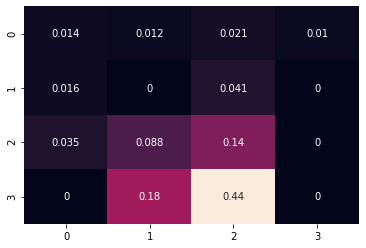

In [16]:
random_p = policy_random(env)
print("Initial random policy: \n", random_p)
print("\nPolicy evaluation starts...")
final_state_values = policy_evaluation(env, random_p)
print("\nValue function of random policy: \n", final_state_values)
print("\nHeatmap plot of random policy's value function:")
sns.heatmap(final_state_values.reshape(4, 4), annot=True, cbar=False);

> (Optional): Repeat the above for q.

I create an action value function, which calculates values of all action at a given state.


In [17]:
# Get a list of action values at a given state
def get_q(env, state_matrix, state, discount=1):
  q = np.zeros(env.action_space.n)
  for i in range(len(q)):
    for action_prob, next_state, reward, gameover in env.env.P[state][i]:
      q[i] += action_prob * (reward + discount * state_matrix[next_state])
  return q

Testing action value function q and report results:

Using the final state values from last section, I tested q function. Each calculated action value for all states are stored in a 16 x 4 np array.

Action values function q for all states 
 [[0.01393977 0.01624865 0.01163091 0.01393977]
 [0.01393977 0.         0.02095297 0.01163091]
 [0.01163091 0.04075153 0.01047648 0.02095297]
 [0.02095297 0.         0.01047648 0.01047648]
 [0.01624865 0.03480619 0.         0.01393977]
 [0.         0.         0.         0.        ]
 [0.         0.14205316 0.         0.02095297]
 [0.         0.         0.         0.        ]
 [0.03480619 0.         0.08816993 0.01624865]
 [0.03480619 0.17582037 0.14205316 0.        ]
 [0.08816993 0.43929118 0.         0.04075153]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.17582037 0.43929118 0.08816993]
 [0.17582037 0.43929118 1.         0.14205316]
 [0.         0.         0.         0.        ]]
Heatmap plot for q function for all states:


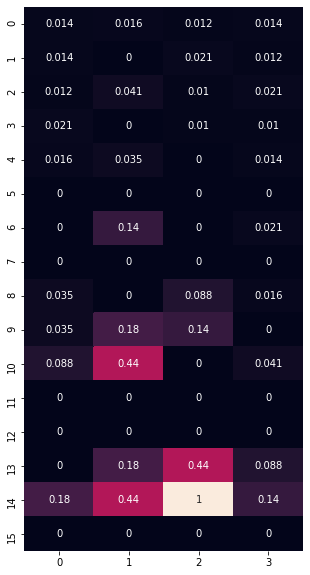

In [18]:
Q = np.zeros([16, 4])
for i in range(env.observation_space.n):
    Q[i] = get_q(env, final_state_values, i)
print("Action values function q for all states \n", Q)
print("Heatmap plot for q function for all states:")
plt.figure(figsize=(5, 10))
sns.heatmap(Q, annot=True, cbar=False);

#### Part 2: Policy improvement
> Question: How would you use P and your value function to improve an arbitrary policy, pi, per Chapter 4?

Given an arbitrary policy pi, value function of pi and environemnt dynamics P, policy can be improved by following pesudo steps:
1. Looping through each state and compute action values array q
2. For each state select the action with highest value from q
3. Update the selected action or actions in policy with corresponding probability, this will be the improved new policy
4. Return new policy



In [18]:
# Find the best rewarded action at each state
def improve_policy(env, state_matrix):
   policy = np.zeros([env.observation_space.n, env.action_space.n])/env.action_space.n
   for i in range(env.observation_space.n):
     q = get_q(env, state_matrix, i)
     highest_rewards = np.amax(q, axis=0)
     selected_actions = np.where(q == highest_rewards)[0]
     prob = 0 if len(selected_actions)==0 else 1/len(selected_actions)
     policy[i][selected_actions] = prob
   return policy

Testing policy improvement function and present results:

I used random policy from last section and the computed state values to test improving policy function. Results are printed as shown, it is observed that all H states have 0.25 for all actions, since they are already failed game. And for other states, the action with highest action value is chosen. If two actions in one state have the same action value, each will be assigned with equal probability of 0.5.

Initial random policy: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
Improved policy: 
 [[0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.25 0.25 0.25 0.25]]
Heatmap plot for improved policy:


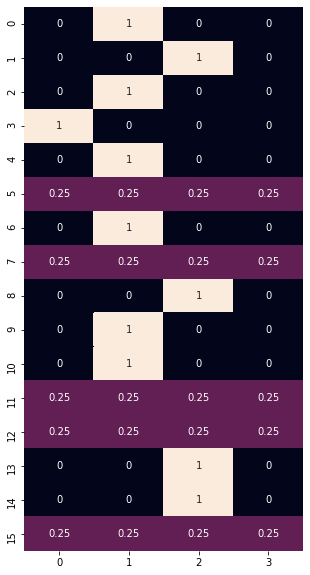

In [20]:
p = improve_policy(env, final_state_values)
print("Initial random policy: \n", random_p)
print("Improved policy: \n", p)
print("Heatmap plot for improved policy:")
plt.figure(figsize=(5, 10))
sns.heatmap(p, annot=True, cbar=False);

#### Part 3: Policy iteration

> Practical: Code the policy iteration process, and employ it to arrive at a
policy that solves this problem. Show your testing results, and ensure
it reports the number of iterations for each step: (a) overall policy
iteration steps and (b) evaluation steps.

The policy iteration is implemented in a way that it will start with a random initial policy, as the results shown, it converages in 2 policy iterations, however, each iteration takes 2 policy evaluation steps as shown in table below:

| Policy iterations | Policy evaluation iterations |
|------------------|-----------------------------|
| 1                | 57                          |
|                  | 7                           |
| 2                | 7                           |
|                  | 671                         | 

Therefore, although policy iteration converages in 2 iterations, it is still not efficient as it requires multiple full sweep policy evaluation. The total run time of policy_iteration function is 0.1244s.

In [23]:
def policy_iteration(env, theta=1e-6):
  # Start with random policy with equal probability among actions
  policy = policy_random(env)
  iteration = 0
  while True:
    iteration += 1
    print("-----------Policy iteration ", iteration, "------------")
    state_values = policy_evaluation(env, policy)
    improved_policy = improve_policy(env, state_values)
    improved_state_values = policy_evaluation(env, improved_policy)
    if np.max(abs(state_values - improved_state_values)) < theta:
      break
    policy = improved_policy
  print("------------End of policy iteration----------------------")
  print("Policy iteration takes ", iteration, " iterations to converage")
  return policy, state_values

-----------Policy iteration  1 ------------
Last iteration state value change is:  8.452946887588242e-09
Policy evaluation takes 57 iteration to converage.
Last iteration state value change is:  0
Policy evaluation takes 7 iteration to converage.
-----------Policy iteration  2 ------------
Last iteration state value change is:  0
Policy evaluation takes 7 iteration to converage.
Last iteration state value change is:  9.834140390907464e-09
Policy evaluation takes 671 iteration to converage.
------------End of policy iteration----------------------
Policy iteration takes  2  iterations to converage

Total runtime of policy iteration:  0.1244041919708252 s

Heatmap plot for final policy after policy iteration:


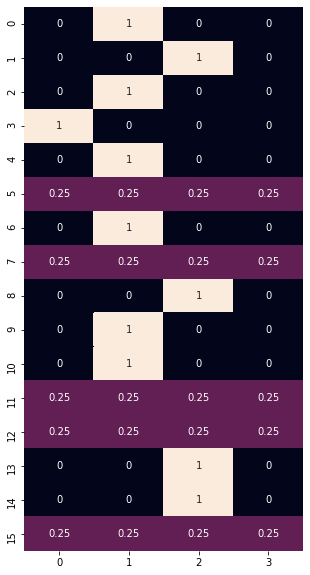

Heatmap plot for final state value after policy iteration:


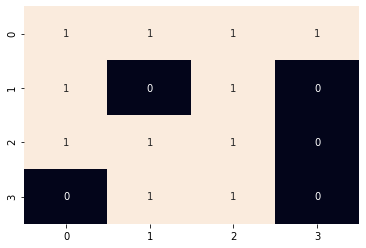

In [24]:
# Time policy iteration run time
start_time = time.time()
policy_pi, state_value_pi = policy_iteration(env)
print("\nTotal runtime of policy iteration: ", time.time() - start_time, "s\n")

# Plot heat map of final policy
print("Heatmap plot for final policy after policy iteration:")
plt.figure(figsize=(5, 10))
sns.heatmap(policy_pi, annot=True, cbar=False);
plt.show()

# Plot heat map of final state value
print("Heatmap plot for final state value after policy iteration:")
sns.heatmap(state_value_pi.reshape(4, 4), annot=True, cbar=False);

#### Part 4: Value iteration

> Practical: Code the value iteration process, and employ it to arrive at a
policy that solves this problem. Show your testing results, reporting
the iteration counts.
Comment on the difference between the iterations required for policy vs
value iteration.

This value iteration takes 7 iterations to converage. which is less than policy iteration if including policy evaluation steps. The overall runtime of this value_iteration function is only 0.00265s, which is significantly faster than policy iteration. Both iteration reached the same final state value as shwon in heatmap plot.

In [25]:
def value_iteration(env, theta=1e-6):
  # Initial state values
  state_value = np.zeros(env.observation_space.n)
  iteration = 0
  while True:
    change = 0
    iteration += 1
    for s in range(len(state_value)):
        old_state_value = state_value[s]
        state_value[s] = max(get_q(env, state_value, s))
        change = max(change, abs(state_value[s] - old_state_value))
    if change < theta:
        break
  policy = improve_policy(env, state_value)
  print("Value iteration takes", iteration, "iterations to converage")
  return policy, state_value

Value iteration takes 7 iterations to converage

Total runtime of value iteration:  0.0026450157165527344 s

Heatmap plot for final policy after value iteration:


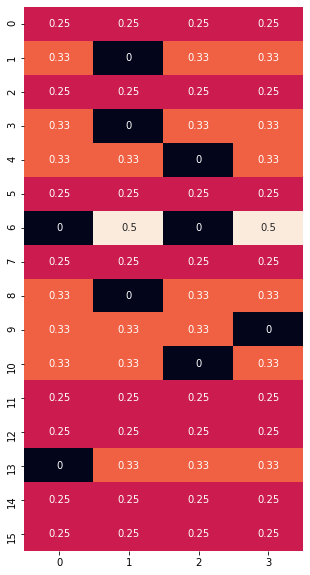

Heatmap plot for final state value after value iteration:


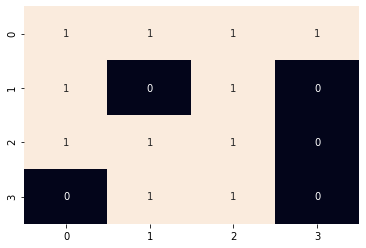

In [26]:
# Time value iteration run time
start_time = time.time()
policy_vi, state_value_vi = value_iteration(env)
print("\nTotal runtime of value iteration: ", time.time() - start_time, "s\n")

# Plot heatmap of final policy
print("Heatmap plot for final policy after value iteration:")
plt.figure(figsize=(5, 10))
sns.heatmap(policy_vi, annot=True, cbar=False);
plt.show()

# Plot heatmap of final state value
print("Heatmap plot for final state value after value iteration:")
sns.heatmap(state_value_vi.reshape(4, 4), annot=True, cbar=False);

#### Part 5: Test on new environment (is_slippery)

> Optional: instead of the above environment, use the "slippery" Frozen Lake via
env = gym.make("FrozenLake-v0")

Similar results are observed for this new environment as well, policy iteration takes 3 iterations to converage and each iteration takes hundreds of iterations for policy evaluation to converage, total runtime of policy iteration is 0.5618s.

Value iteration takes 456 iterations to converage in total and final runtime is 0.09188s, which is much faster than policy iteration.

Also, after we set is_slippery to True, actions for each state is no longer deterministic, hence the resulting final state value is different from previous environemnt. However, we can see that H states still have value of 0 and other state closer to G states have higher state values, which means our policy is learning the environment correctly.

In [31]:
# Update env with is_slippery = True
env = gym.make("FrozenLake-v0")

Policy iteration with is_slippery = True

-----------Policy iteration  1 ------------
Last iteration state value change is:  8.452946891057689e-09
Policy evaluation takes 57 iteration to converage.
Last iteration state value change is:  9.840161019347704e-09
Policy evaluation takes 362 iteration to converage.
-----------Policy iteration  2 ------------
Last iteration state value change is:  9.840161019347704e-09
Policy evaluation takes 362 iteration to converage.
Last iteration state value change is:  9.846055970541556e-09
Policy evaluation takes 458 iteration to converage.
-----------Policy iteration  3 ------------
Last iteration state value change is:  9.846055970541556e-09
Policy evaluation takes 458 iteration to converage.
Last iteration state value change is:  9.846055970541556e-09
Policy evaluation takes 458 iteration to converage.
------------End of policy iteration----------------------
Policy iteration takes  3  iterations to converage
Total runtime of policy iteration:  0.5617854595184326 s
Heatmap plot for final po

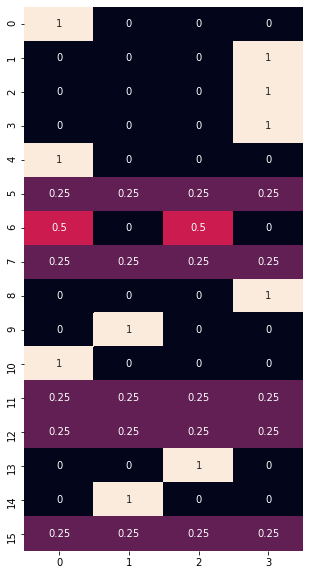

Heatmap plot for final state value after policy iteration:


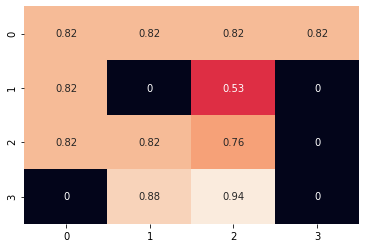

In [32]:
# Time policy iteration run time
start_time = time.time()
policy_pi, state_value_pi = policy_iteration(env)
print("Total runtime of policy iteration: ", time.time() - start_time, "s")

# Heatmap plot for final policy
print("Heatmap plot for final policy after policy iteration:")
plt.figure(figsize=(5, 10))
sns.heatmap(policy_pi, annot=True, cbar=False);
plt.show()

# Heatmap plot for final state value
print("Heatmap plot for final state value after policy iteration:")
sns.heatmap(state_value_pi.reshape(4, 4), annot=True, cbar=False);

Value iteration with is_slippery = True

Value iteration takes 321 iterations to converage
Total runtime of value iteration:  0.09188199043273926 s
Heatmap plot for final policy after value iteration:


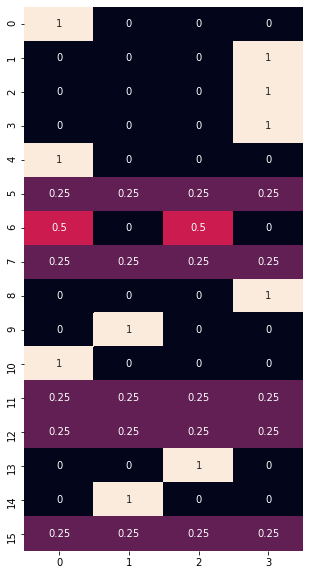

Heatmap plot for final state value after value iteration:


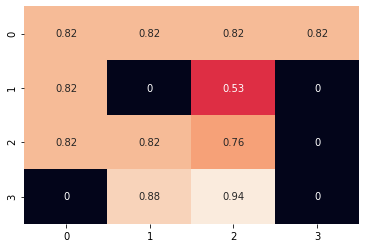

In [33]:
# Time value iteration run time
start_time = time.time()
policy_vi, state_value_vi = value_iteration(env)
print("Total runtime of value iteration: ", time.time() - start_time, "s")

# Heatmap plot for final policy
print("Heatmap plot for final policy after value iteration:")
plt.figure(figsize=(5, 10))
sns.heatmap(policy_vi, annot=True, cbar=False);
plt.show()

# Heatmap ploy for final state value
print("Heatmap plot for final state value after value iteration:")
sns.heatmap(state_value_vi.reshape(4, 4), annot=True, cbar=False);